In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import pandas as pd
import numpy as np
df = pd.read_csv("Reduced_Train.csv")

#Loading all modules and the file


In [2]:
df.columns

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

In [3]:
df.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       5
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     4
Gender                 0
Discount_offered       0
Weight_in_gms          8
Reached.on.Time_Y.N    0
dtype: int64

In [4]:
#Dropping PLOTID, Latitude and Longitude 

df = df.drop(['ID'], axis = 1)

In [5]:
df.describe(include='all')

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,2000,1995,2000.000000,2000.000000,2000.000000,2000.000000,1996,2000,2000.000000,1992.000000,2000.000000
unique,3,3,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN
top,B,Ship,NaN,NaN,NaN,NaN,low,F,NaN,NaN,NaN
freq,683,1352,NaN,NaN,NaN,NaN,984,1049,NaN,NaN,NaN
mean,NaN,NaN,4.052500,2.970500,209.920000,3.602500,NaN,NaN,13.700000,3571.191767,0.614000
std,NaN,NaN,1.155167,1.409476,48.047486,1.530904,NaN,NaN,16.627514,1643.741036,0.486952
min,NaN,NaN,2.000000,1.000000,96.000000,2.000000,NaN,NaN,1.000000,1004.000000,0.000000
25%,NaN,NaN,3.000000,2.000000,170.000000,3.000000,NaN,NaN,4.000000,1783.500000,0.000000
50%,NaN,NaN,4.000000,3.000000,214.000000,3.000000,NaN,NaN,7.000000,4067.500000,1.000000
75%,NaN,NaN,5.000000,4.000000,251.000000,4.000000,NaN,NaN,11.000000,5005.000000,1.000000


In [6]:
#CATEGORICAL AND NUMERIC COLUMNS

cat_cols=df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
num_cols.remove('Reached.on.Time_Y.N')
print(num_cols)

Categorical Variables:
Index(['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender'], dtype='object')
Numerical Variables:
['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms']


Customer_care_calls
Median 4.0
Mode 0    4
Name: Customer_care_calls, dtype: int64


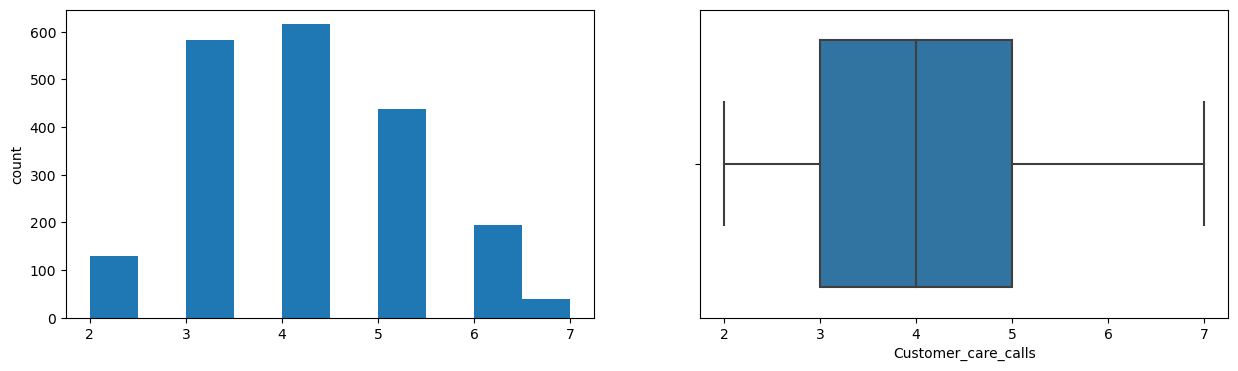

Customer_rating
Median 3.0
Mode 0    3
Name: Customer_rating, dtype: int64


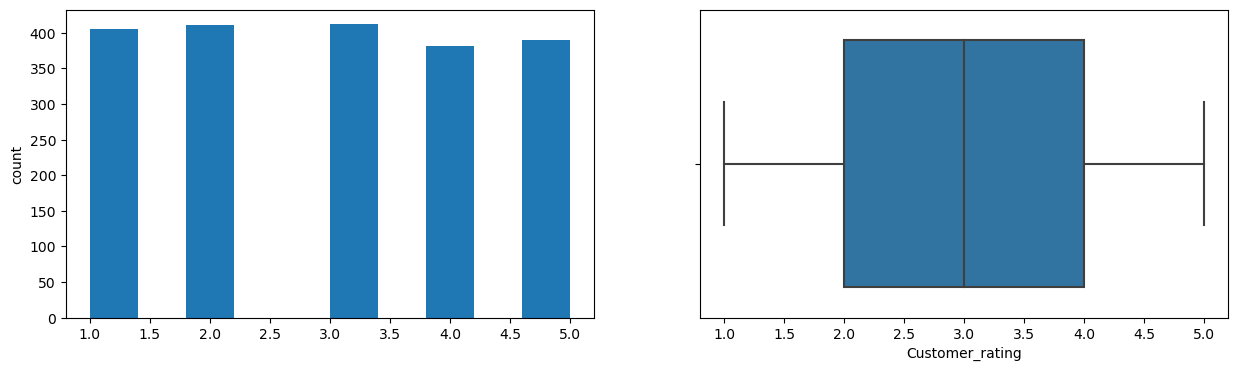

Cost_of_the_Product
Median 214.0
Mode 0    248
Name: Cost_of_the_Product, dtype: int64


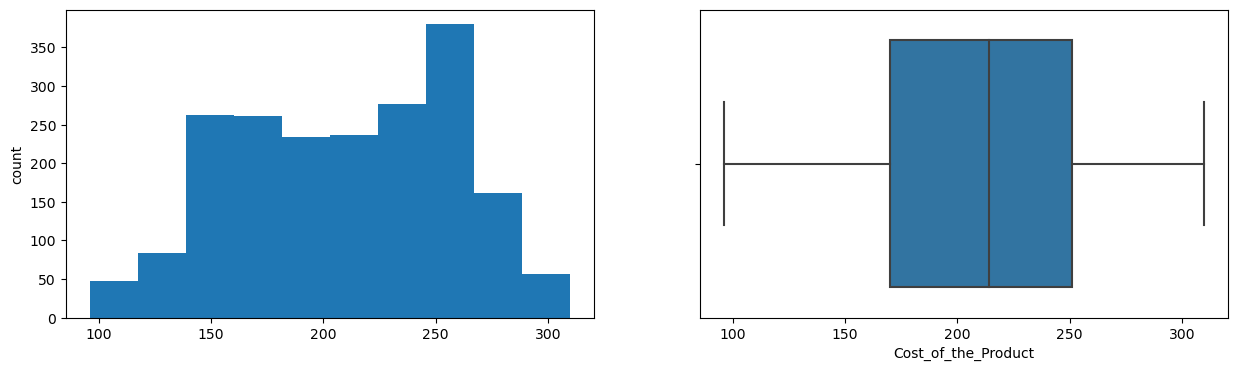

Prior_purchases
Median 3.0
Mode 0    3
Name: Prior_purchases, dtype: int64


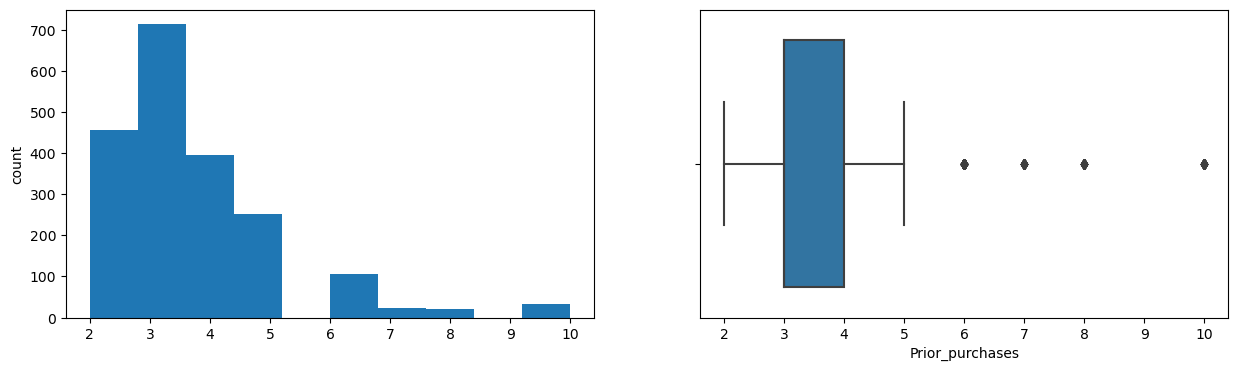

Discount_offered
Median 7.0
Mode 0    1
Name: Discount_offered, dtype: int64


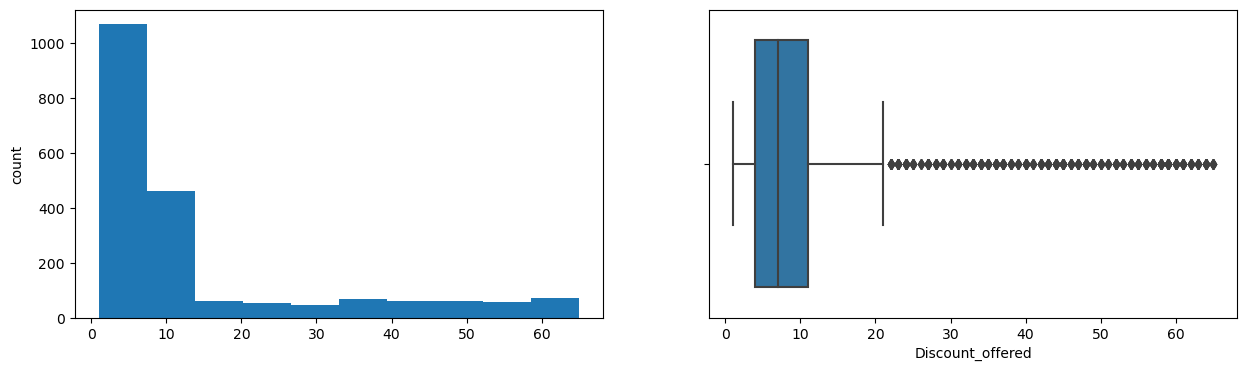

Weight_in_gms
Median 4067.5
Mode 0    1066.0
1    4883.0
Name: Weight_in_gms, dtype: float64


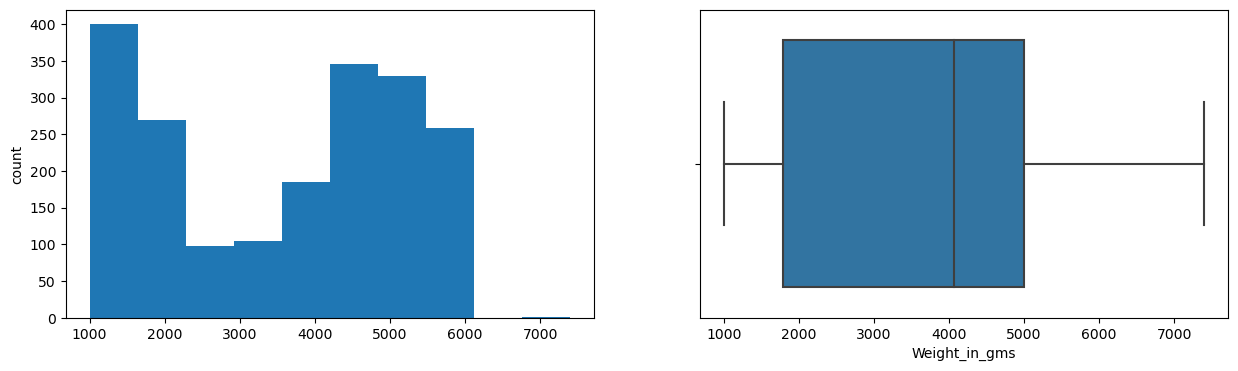

In [7]:
#UNIVARIATE NUMERIC ANALYSIS


for col in num_cols:

    print(col)
    print("Median",df[col].median())
    print("Mode",df[col].mode())
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.show()

                     Customer_care_calls  Customer_rating  \
Customer_care_calls             1.000000         0.001259   
Customer_rating                 0.001259         1.000000   
Cost_of_the_Product             0.325276         0.007670   
Prior_purchases                 0.182663        -0.013320   
Discount_offered               -0.128204        -0.002235   
Weight_in_gms                  -0.261451        -0.009890   
Reached.on.Time_Y.N            -0.091128         0.015471   

                     Cost_of_the_Product  Prior_purchases  Discount_offered  \
Customer_care_calls             0.325276         0.182663         -0.128204   
Customer_rating                 0.007670        -0.013320         -0.002235   
Cost_of_the_Product             1.000000         0.113816         -0.145277   
Prior_purchases                 0.113816         1.000000         -0.065019   
Discount_offered               -0.145277        -0.065019          1.000000   
Weight_in_gms                  -0.102

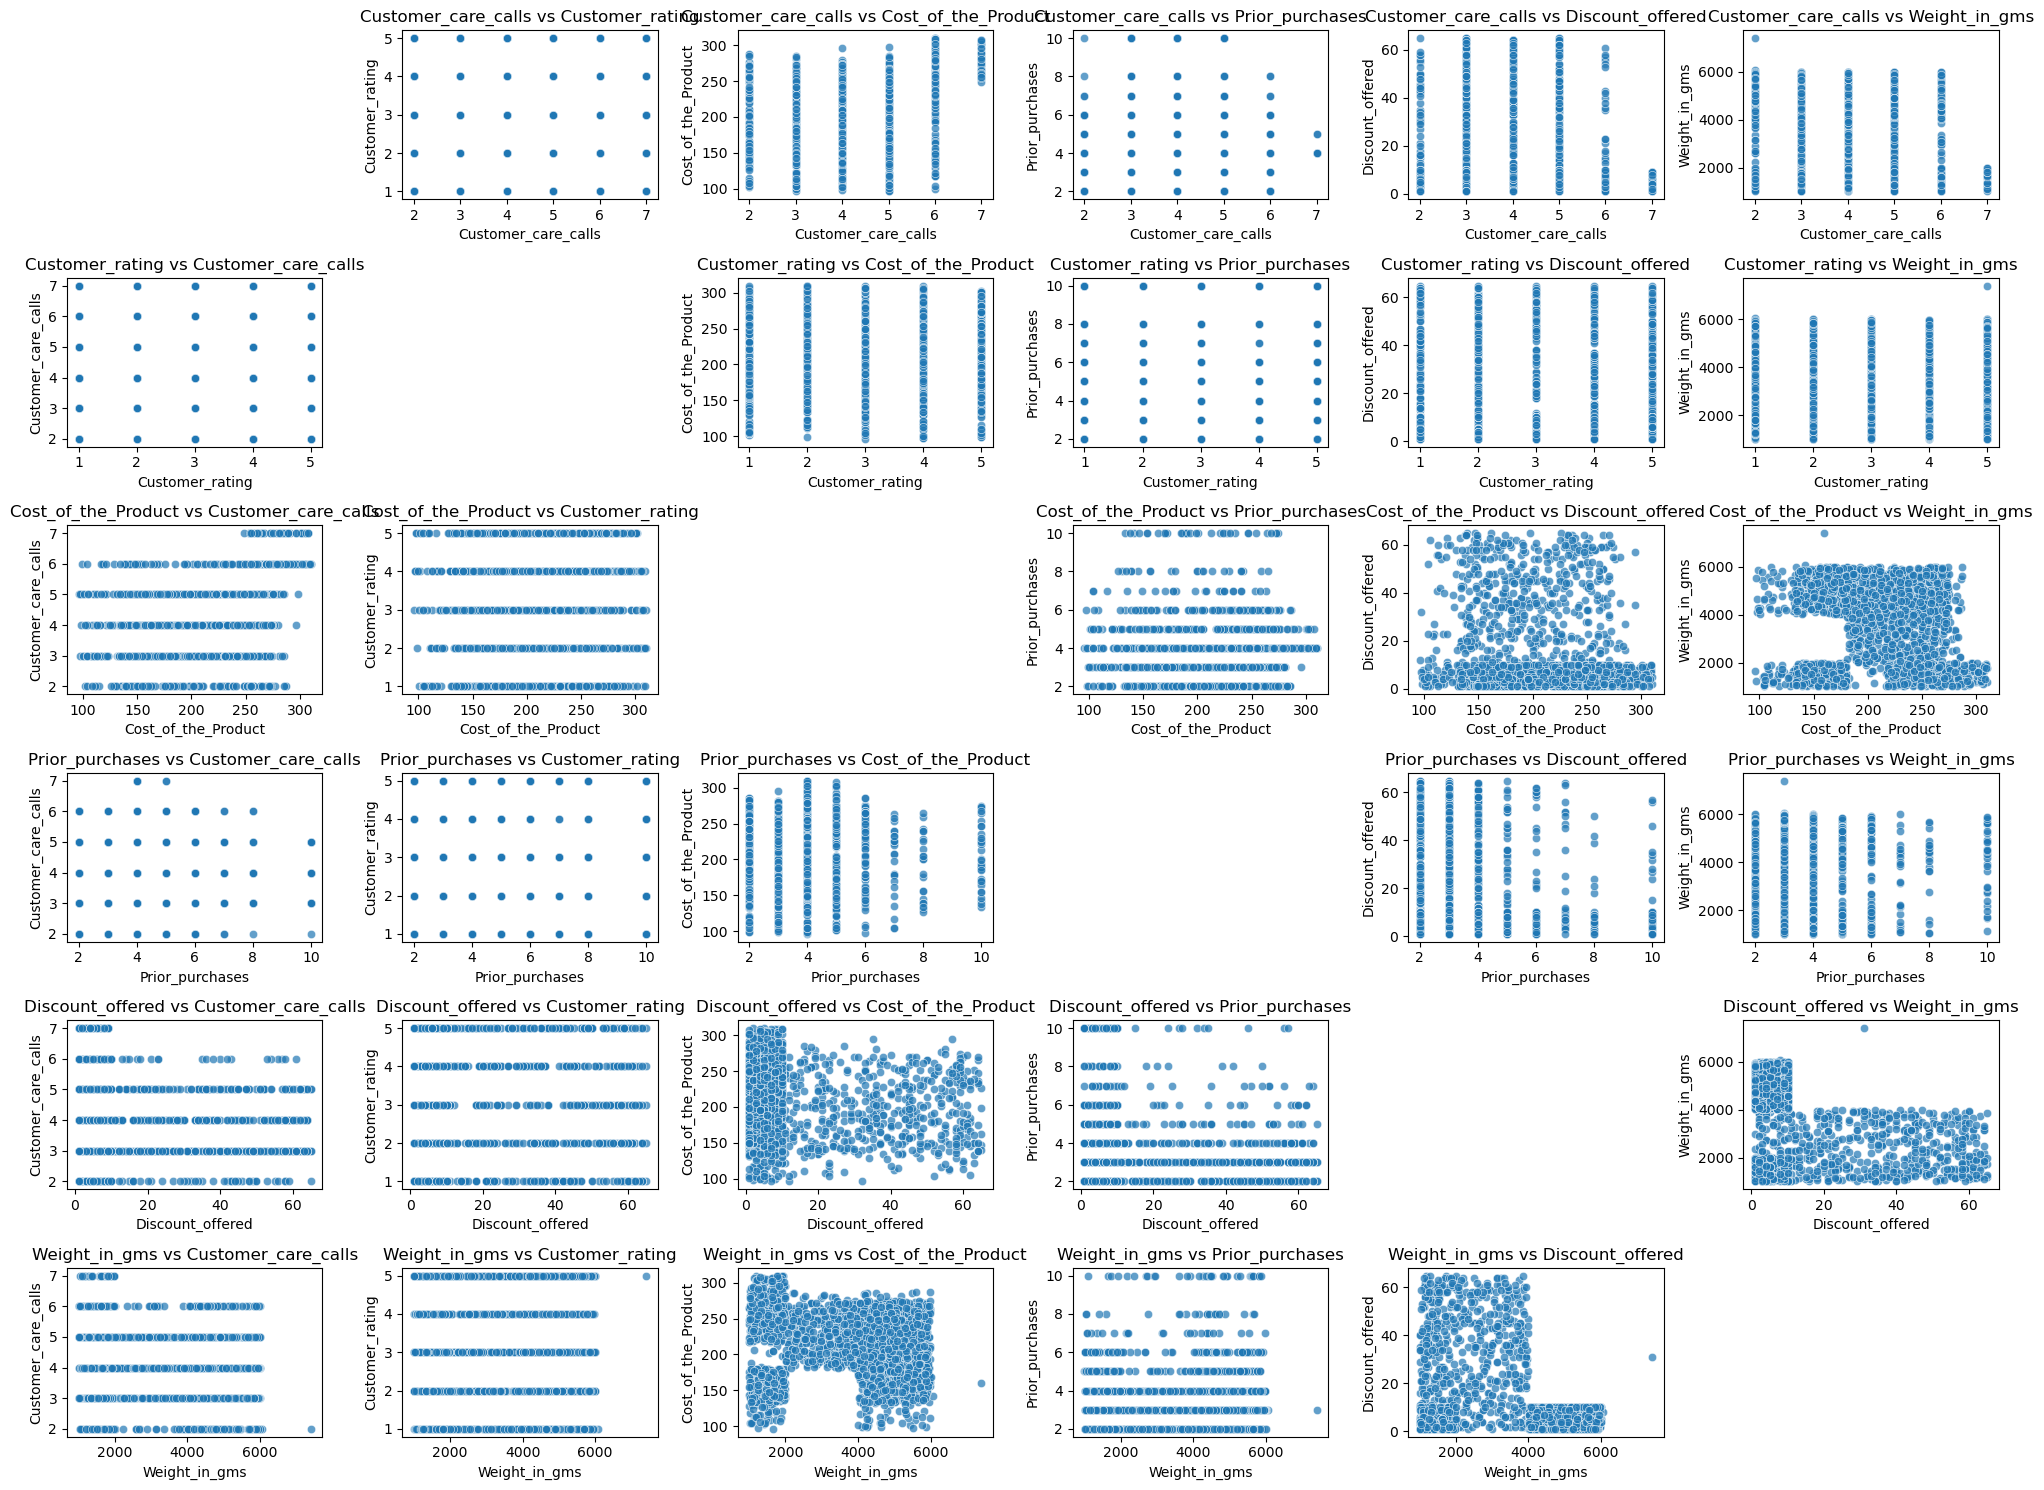

In [10]:
#BIVARIATE NUMERIC ANALYSIS

plt.figure(figsize=(20, 15))
for i, column_x in enumerate(num_cols):
    for j, column_y in enumerate(num_cols):
        if column_x != column_y:  # Skip self-scatter (diagonal)
            plt.subplot(len(num_cols), len(num_cols), i * len(num_cols) + j + 1)
            sns.scatterplot(x=df[column_x], y=df[column_y], alpha=0.7)
            plt.xlabel(column_x)
            plt.ylabel(column_y)
            plt.title(f'{column_x} vs {column_y}')
            plt.tight_layout()


numeric_data = df.select_dtypes(include=['number'])

correlation_matrix = numeric_data.corr()

# Print the correlation matrix
print(correlation_matrix)

# Show the scatter plots
plt.show()

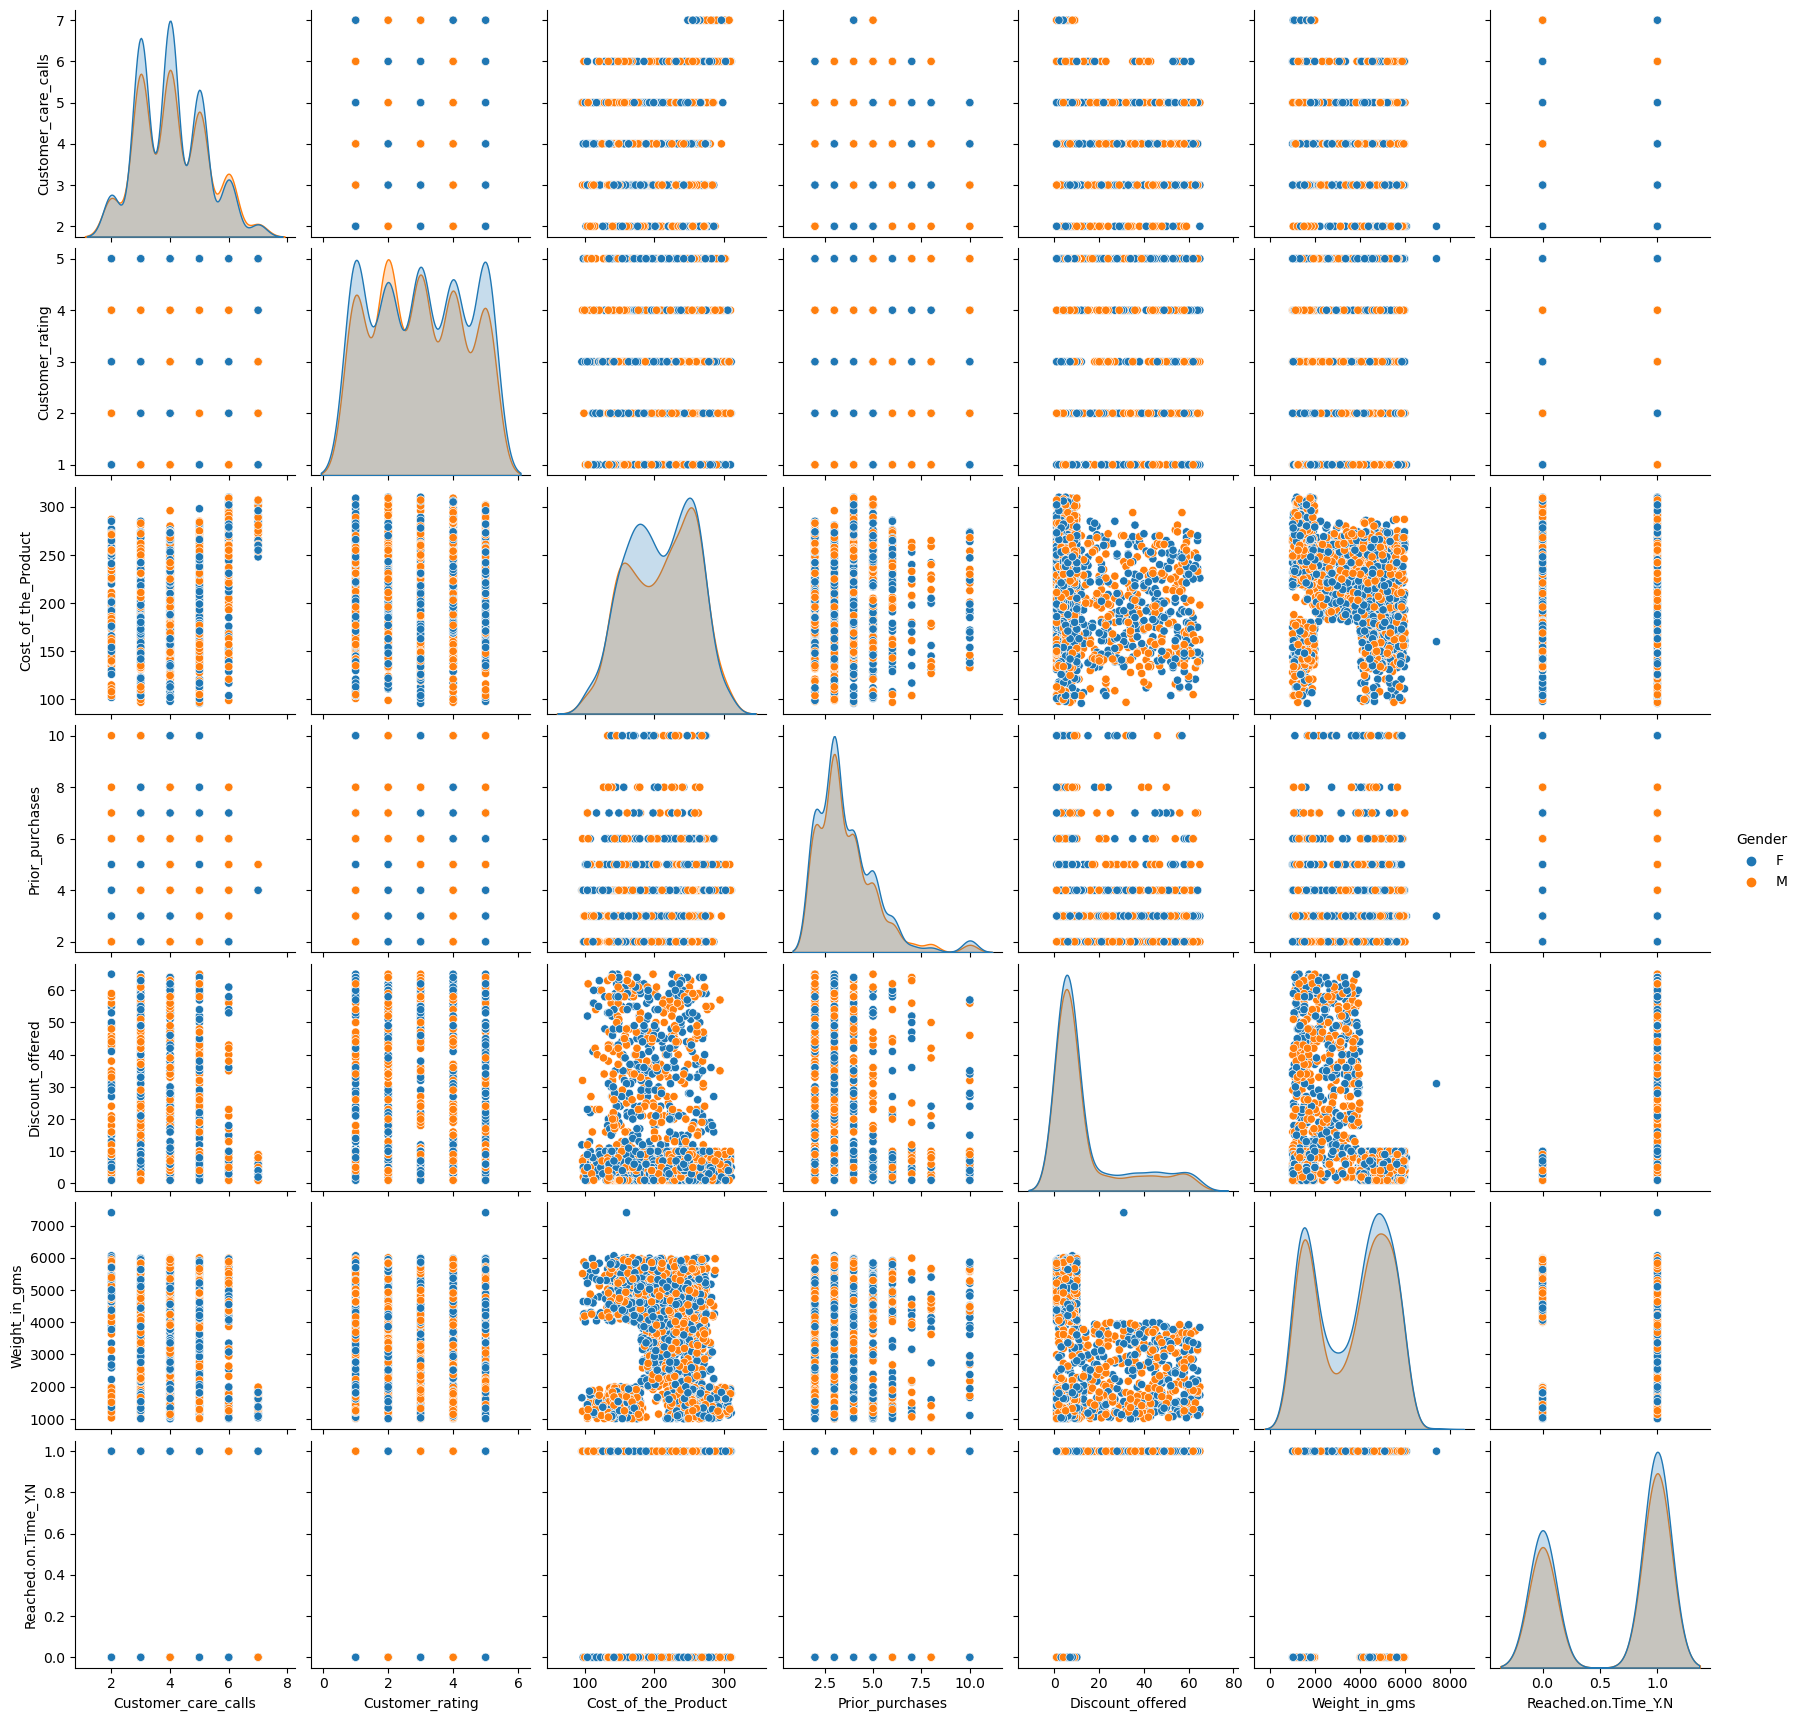

In [ ]:
#MULTIVARIATE NUMERIC ANALYSIS5



sns.pairplot(data=df,hue="Gender")
plt.show()



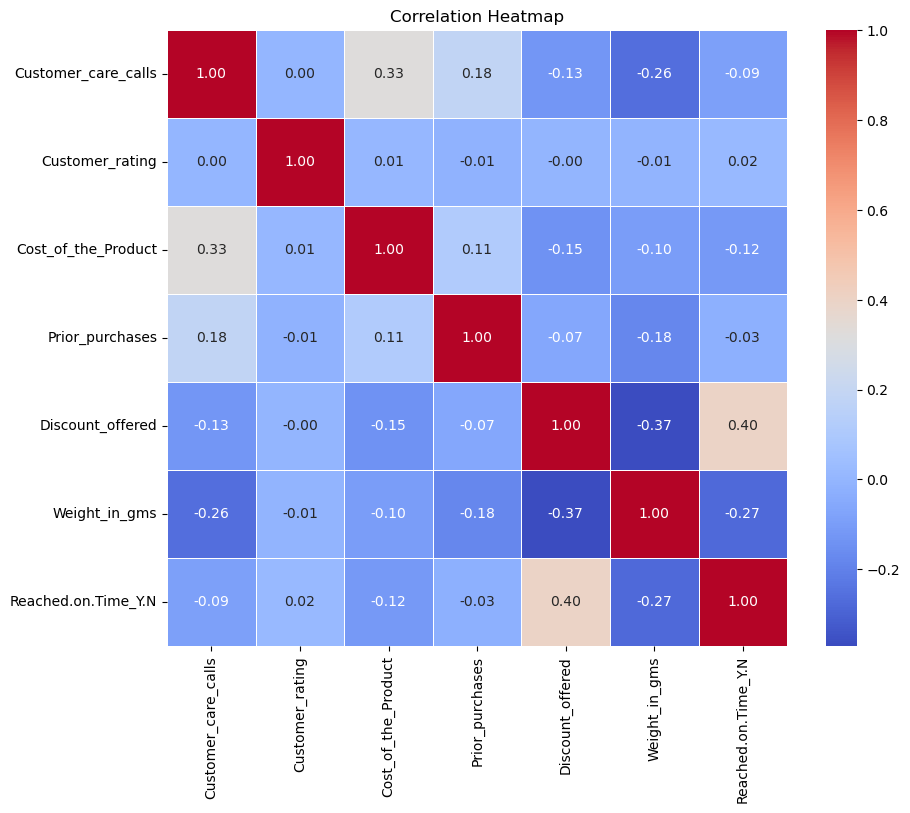

In [ ]:
# Plot heatmap
plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add title and show plot
plt.title('Correlation Heatmap')
plt.show()


Positive Correlations
Discount_offered x Reached_on_Time_Y.N (0.40):
This suggests that higher discounts may be associated with a higher likelihood of on-time delivery.
Negative Correlations
Weight_in_gms x Reached_on_Time_Y.N (-0.27):
A weak negative correlation indicates that heavier shipments are less likely to reach on time.

Discount_offered x Weight_in_gms (-0.37):
Companies might prioritize lightweight items for promotions.

Customer_care_calls x Weight_in_gms (-0.26):
Customers with heavier shipments tend to make fewer customer care calls. This might mean a different customer mindset or demographic for larger deliveries

 No Correlation
Customer_rating x All Other Features:
Customer ratings show near-zero correlations with most variables, indicating that customer satisfaction is independent of shipment weight, product cost, or discounts.
